In [1]:
x = [1, 8, 3, 9, 1, 2, 9, 4, 5, 4, 6, 2]

In [2]:
m = 4 
D = len(x)
assert D % m == 0
D_ = int(D / m) 

In [3]:
u = [x[row:row + D_] for row in range(0, D, D_)]
u 

[[1, 8, 3], [9, 1, 2], [9, 4, 5], [4, 6, 2]]

In [4]:
k = 2 ** 5 
assert k % m == 0
k_ = int(k / m)
print(f'{k=}, {k_=}')

k=32, k_=8


In [5]:
from random import randint 

c = [] 
for j in range(m):
    c_j = [] 
    for i in range(k_):
        c_ji = [randint(0, 9) for _ in range(D_)]
        c_j.append(c_ji)
    c.append(c_j)

c 

[[[3, 9, 6],
  [2, 6, 8],
  [8, 0, 5],
  [5, 1, 9],
  [2, 5, 6],
  [1, 7, 3],
  [5, 0, 6],
  [1, 8, 9]],
 [[4, 3, 1],
  [5, 0, 1],
  [7, 1, 6],
  [3, 3, 7],
  [3, 0, 2],
  [5, 2, 3],
  [7, 6, 0],
  [3, 7, 1]],
 [[8, 4, 8],
  [0, 6, 0],
  [7, 3, 7],
  [4, 2, 0],
  [5, 0, 9],
  [2, 5, 3],
  [4, 5, 1],
  [0, 8, 0]],
 [[8, 6, 2],
  [3, 7, 1],
  [2, 6, 7],
  [6, 4, 9],
  [1, 9, 9],
  [1, 4, 2],
  [4, 1, 0],
  [8, 2, 7]]]

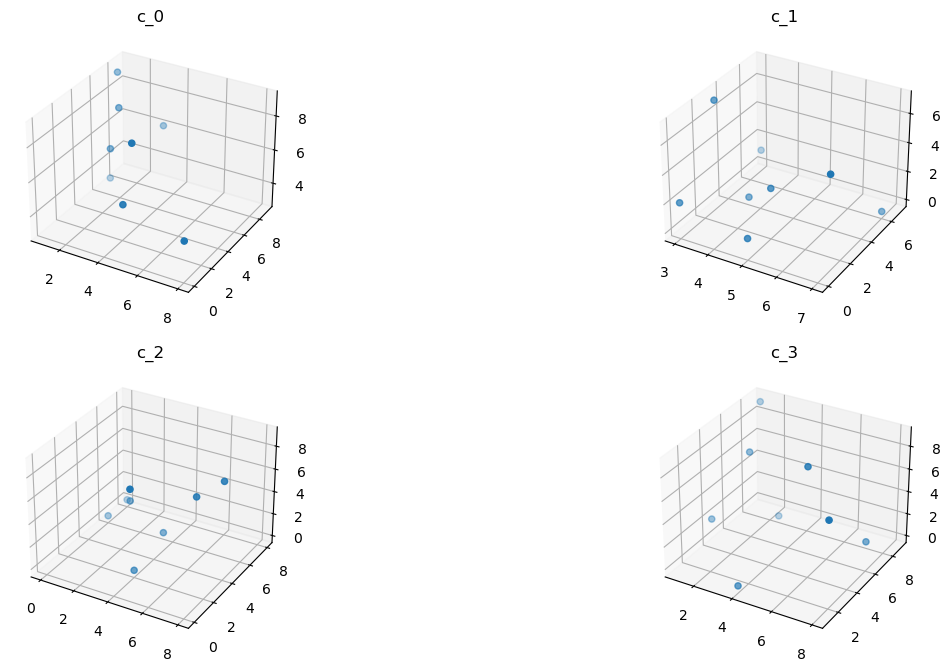

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 8))

for j in range(m):
    ax = fig.add_subplot(2, 2, j + 1, projection='3d')
    X = [c[j][i][0] for i in range(k_)]
    Y = [c[j][i][1] for i in range(k_)]
    Z = [c[j][i][2] for i in range(k_)]
    ax.scatter(X, Y, Z)
    ax.set_title(f'c_{j}')
    # ax.xaxis.set_ticklabels([])
    # ax.yaxis.set_ticklabels([])
    # ax.zaxis.set_ticklabels([])

In [7]:
def euclidean(v, u):
    distance = sum((x - y) ** 2 for x, y in zip(v, u)) ** .5 
    return distance 

def nearest(c_j, u_j):
    distance = 9e9 
    for i in range(k_):
        new_dist = euclidean(c_j[i], u_j)
        if new_dist < distance:
            nearest_idx = i 
            distance = new_dist 
    return nearest_idx

In [8]:
ids = [] 
for j in range(m):
    i = nearest(c[j], u[j])
    ids.append(i)
ids 

[5, 1, 2, 1]

In [9]:
q = [] 
for j in range(m):
    c_ji = c[j][ids[j]]
    q.extend(c_ji)

In [10]:
q

[1, 7, 3, 5, 0, 1, 7, 3, 7, 3, 7, 1]

In [11]:
def mse(v, u):
    error = sum((x - y) ** 2 for x, y in zip(v, u)) / len(v)
    return error 

In [12]:
mse(x, q)

2.5833333333333335

In [13]:
import numpy as np 

def read_fvecs(fp):
    a = np.fromfile(fp, dtype='int32')
    d = a[0] 
    return a.reshape(-1, d + 1)[:, 1:].copy().view('float32')

xb = read_fvecs('sift/sift_base.fvecs')[:1000]
xq = read_fvecs('sift/sift_query.fvecs')[0].reshape(1, -1)

In [14]:
xb.shape, xq.shape

((1000, 128), (1, 128))

In [15]:
m = 8 
D = xb.shape[1]
assert D % m == 0
D_ = int(D / m) 
D_ 

16

In [16]:
k = 2 ** 11 
assert k % m == 0
k_ = int(k / m)
k_ 

256

In [17]:
c = np.random.randint(1, int(xb.max() + 1), (m, k_, D_))
c.shape 

(8, 256, 16)

In [18]:
ub = xb.reshape(-1, m, D_) 
ub.shape 

(1000, 8, 16)

In [19]:
from tqdm import tqdm 
id_b = np.zeros((xb.shape[0], m), dtype=np.uint8)
for row, u in enumerate(tqdm(ub)):
    for j in range(m):
        idx = nearest(c[j], u[j]) 
        id_b[row, j] = idx 
id_b.shape 

100%|██████████| 1000/1000 [01:09<00:00, 14.32it/s]


(1000, 8)

In [20]:
id_b[:5]

array([[193, 171, 222, 109,  21, 225, 219,  46],
       [201,  78,  30, 199, 117, 240,  88, 196],
       [ 37, 171, 222,   5, 139, 225, 219,  46],
       [192,  78,  30, 142, 117, 240,   0, 196],
       [ 71,  45, 222,  58, 139, 225, 219, 196]], dtype=uint8)

In [21]:
uq = xq.reshape(m, D_)
uq.shape 

(8, 16)

In [22]:
j = 2 
row = 5 
c[j][id_b[row][j]]

array([129,  25,  86,  10,  58,  27,  45,  70, 116,  96,   5,  26,  89,
       109,  38,   9])

In [23]:
all_dist = [] 

for row in range(id_b.shape[0]):
    u_dist = 0 
    for j in range(m):
        qb_j = c[j][id_b[row][j]]
        u_dist += np.linalg.norm(uq[j] - qb_j)
    all_dist.append((u_dist, row))

In [24]:
all_dist[:5]

[(1907.014384572988, 0),
 (1953.0069307223182, 1),
 (1981.769426428778, 2),
 (1952.4542056553776, 3),
 (1883.6507962030776, 4)]

In [25]:
all_dist.sort() 
all_dist[:5]

[(1515.9195649621336, 93),
 (1517.5769717185392, 280),
 (1525.0562034591258, 287),
 (1525.0562034591258, 609),
 (1540.8914700810712, 643)]

In [26]:
np.mean(np.linalg.norm(xb - xq, axis=1))

524.0475

In [27]:
for dist, idx in all_dist[:15]:
    print(f'{idx}: {np.linalg.norm(xb[idx] - xq)}')

93: 387.90850830078125
280: 378.82977294921875
287: 341.2462463378906
609: 368.2906494140625
643: 370.2404479980469
107: 326.8072814941406
411: 370.8759765625
816: 311.03216552734375
982: 461.97076416015625
496: 464.5965881347656
645: 458.5346374511719
696: 337.1260986328125
224: 313.8375244140625
292: 314.4996032714844
155: 375.1159973144531


In [28]:
dist_arr = np.linalg.norm(xb - xq, axis=1)
true_lowest = np.argsort(dist_arr)[:15]
prev_idx = [x[1] for x in all_dist[:15]]
for true_idx in true_lowest:
    print(f'{true_idx}: {round(dist_arr[true_idx], 2)} | {true_idx in prev_idx}')

882: 282.32000732421875 | False
190: 292.94000244140625 | False
816: 311.0299987792969 | True
224: 313.8399963378906 | True
292: 314.5 | True
492: 321.8500061035156 | False
146: 326.5299987792969 | False
107: 326.80999755859375 | True
641: 331.0400085449219 | False
598: 334.32000732421875 | False
370: 334.5 | False
121: 334.9800109863281 | False
124: 336.5 | False
696: 337.1300048828125 | True
924: 340.1300048828125 | False


In [29]:
xb.min(), xb.max()

(0.0, 157.0)

### PQ and Faiss

In [30]:
import numpy as np 

def read_fvecs(fp):
    a = np.fromfile(fp, dtype='int32')
    d = a[0] 
    return a.reshape(-1, d + 1)[:, 1:].copy().view('float32')

xb = read_fvecs('sift/sift_base.fvecs')[:500_000]
xq = read_fvecs('sift/sift_query.fvecs')[0].reshape(1, -1)

In [31]:
import faiss

D = xb.shape[1] 
m = 8 
assert D % m == 0
nbits = 8 
index = faiss.IndexPQ(D, m, nbits)

In [32]:
index.is_trained

False

In [33]:
index.train(xb)

In [34]:
index.add(xb)

In [35]:
k = 100 
dist, I = index.search(xq, k)

In [36]:
%%time
index.search(xq, k)

CPU times: total: 78.1 ms
Wall time: 2.99 ms


(array([[57704.727, 68179.72 , 68577.79 , 69361.4  , 70392.664, 71037.17 ,
         71496.72 , 71917.33 , 72319.875, 72412.7  , 72704.77 , 72882.305,
         73696.55 , 73732.22 , 74392.336, 74995.47 , 75150.   , 75445.25 ,
         75590.516, 75785.14 , 75981.28 , 76316.06 , 76636.36 , 76678.58 ,
         76718.83 , 76752.9  , 76958.83 , 77013.73 , 77224.516, 77437.734,
         78019.45 , 78140.76 , 78220.11 , 78308.92 , 78362.31 , 78541.81 ,
         78575.8  , 78592.86 , 78597.28 , 78926.54 , 79152.66 , 79277.08 ,
         79302.49 , 79328.74 , 79472.48 , 79515.805, 79521.18 , 79652.45 ,
         79745.516, 79761.77 , 79870.555, 79903.1  , 80186.84 , 80243.47 ,
         80405.7  , 80499.14 , 80609.305, 80723.8  , 80731.305, 80959.84 ,
         81072.336, 81072.336, 81081.984, 81175.734, 81180.984, 81247.16 ,
         81399.91 , 81411.43 , 81676.83 , 81719.664, 81873.18 , 81923.34 ,
         81928.42 , 81928.42 , 81955.14 , 82023.51 , 82036.875, 82080.43 ,
         82093.76 , 82336

In [37]:
l2_index = faiss.IndexFlatL2(D) 
l2_index.add(xb)

In [38]:
%%time
l2_dist, l2_I = l2_index.search(xq, k)

CPU times: total: 46.9 ms
Wall time: 48.9 ms


In [39]:
sum([1 for i in I[0] if i in l2_I])

50

In [40]:
import os 

def get_memory(index):
    faiss.write_index(index, './temp.index')
    file_size = os.path.getsize('./temp.index')
    os.remove('./temp.index')
    return file_size 

In [41]:
get_memory(l2_index)

256000045

In [42]:
get_memory(index)

4131158

In [43]:
vecs = faiss.IndexFlatL2(D) 

nlist = 2048 
nbits = 8 
index = faiss.IndexIVFPQ(vecs, D, nlist, m, nbits)
print(f'{2 ** nbits = }')

2 ** nbits = 256


In [44]:
index.is_trained

False

In [45]:
index.train(xb)

In [46]:
index.add(xb)

In [47]:
%%time 
dist, I = index.search(xq, k)

CPU times: total: 46.9 ms
Wall time: 2.99 ms


In [48]:
sum([1 for i in I[0] if i in l2_I])

32

In [49]:
index.nprobe = 2 

In [50]:
dist, I = index.search(xq, k) 

In [51]:
sum([1 for i in I[0] if i in l2_I])

39

In [52]:
index.nprobe = 48 
dist, I = index.search(xq, k)
sum([1 for i in I[0] if i in l2_I])

49

In [53]:
index.nprobe = 2048 
dist, I = index.search(xq, k)
sum([1 for i in I[0] if i in l2_I])

50

In [54]:
index.nprobe = 48 

In [55]:
print(f'IVFPQ: {get_memory(index)}\nFlat: {get_memory(l2_index)}')

IVFPQ: 9196212
Flat: 256000045
